<a href="https://colab.research.google.com/github/Aniq55/genMarkov/blob/ab%2Fmaster/markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

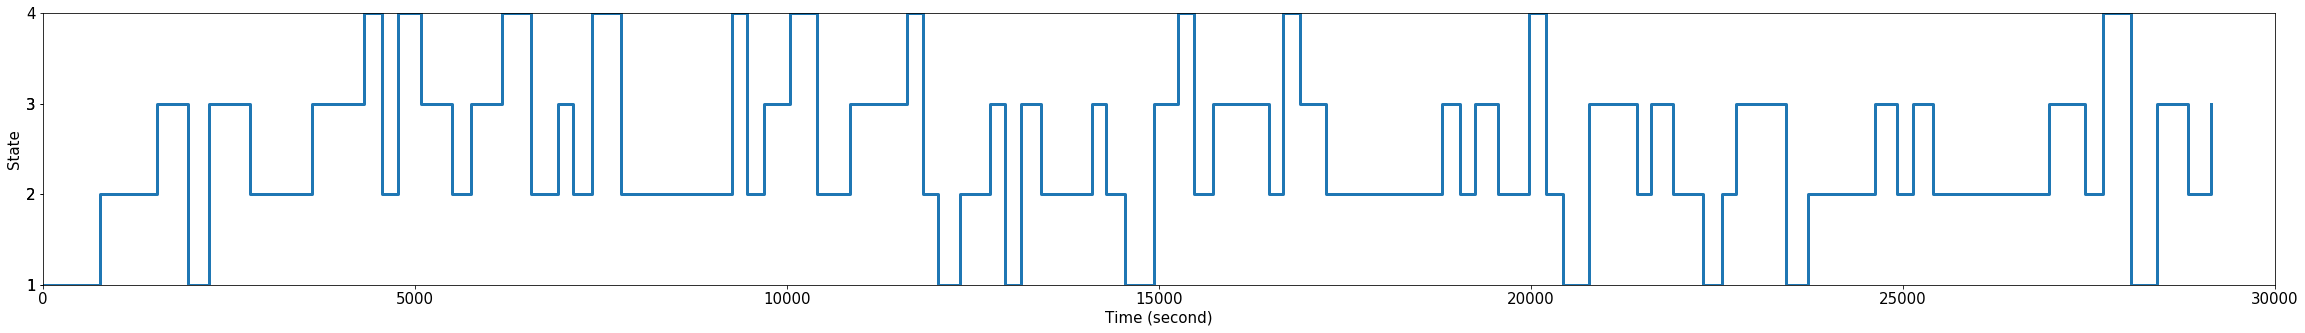

In [6]:
import numpy as np
from markov import *
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 15})


class PoissonProcess():

    def __init__(self, L, B, W):
        self.Lambda= L
        self.beta= B
        self.omega= W

    def time_variance(self, t):
        return self.Lambda + self.beta*np.sin(self.omega*t)

    def interval(self, t):
        return np.random.poisson(self.time_variance(t))


pp= PoissonProcess(300, 100, 2*np.pi/1200)
mm= MarkovModel(0.5, 0.2, 4)


CHAIN={}
CHAIN['STATE']=[]
CHAIN['TIME']=[]

CHAIN['STATE'].append(0)
CHAIN['TIME'].append(0)

ITERATIONS= 100
for i in range(ITERATIONS):
    CHAIN['STATE'].append(mm.transition())
    CHAIN['TIME'].append(CHAIN['TIME'][-1] + pp.interval(CHAIN['TIME'][-1]))


for num in range(len(CHAIN["STATE"])):
    CHAIN["STATE"][num] += 1
    
plt.figure(figsize=(40,5))
# plt.plot(CHAIN['TIME'], CHAIN['STATE'])
plt.step(CHAIN['TIME'], CHAIN['STATE'], where="post", linewidth=3)
plt.ylim(1, 4)
plt.xlim(0, 30000)
plt.xlabel("Time (second)")
plt.ylabel("State")
yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)
plt.savefig('state_v_time.eps', format='eps', dpi=1000)
plt.show()
